# Evaluating the LLM Models
Mahan Madani - Mohammad Mehdi Begmaz

## Load basic libraries and models

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
import torch

from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    AutoTokenizer,
    DataCollatorForLanguageModeling,
    TrainingArguments,
    Trainer)

import evaluate
from evaluate import load
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/BG3_reviews_preprocessed.csv")  # load the preprocessed version of the dataset
print(df.columns)
print(df.shape)

Index(['review', 'voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score',
       'word_count', 'profanity'],
      dtype='object')
(10000, 7)


In [3]:
model_v1 = AutoModelForCausalLM.from_pretrained("./model/v1")
tokenizer_v1 = AutoTokenizer.from_pretrained("./model/v1")

In [4]:
model_v2 = AutoModelForCausalLM.from_pretrained("./model/v2")
tokenizer_v2 = AutoTokenizer.from_pretrained("./model/v2")

In [5]:
model_v3 = AutoModelForCausalLM.from_pretrained("./model/v3")
tokenizer_v3 = AutoTokenizer.from_pretrained("./model/v3")

In [6]:
model_v4 = AutoModelForCausalLM.from_pretrained("./model/v4")
tokenizer_v4 = AutoTokenizer.from_pretrained("./model/v4")

In [17]:
def generate_samples(model, tokenizer, count=10, print_text=True):
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    sample = []
    for _ in range(count):
        generated_text = model.generate(do_sample=True, top_k=50, top_p=0.95, pad_token_id=tokenizer.pad_token_id, max_new_tokens=200)
        generated_text = tokenizer.decode(generated_text[0], skip_special_tokens=True)
        sample.append(generated_text)

        if print_text:
            print(generated_text)
        
    return sample

In [8]:
from transformers.utils import logging
import transformers

logging.set_verbosity(transformers.logging.ERROR)

## Evaluating the text generator models

### Evaluation using  ROUGE

In [41]:
def evaluate_rouge(reference_texts, generated_text):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(' '.join(reference_texts), ' '.join(generated_text))
    print(f"\nROUGE Scores: {rouge_scores}")

In [42]:
evaluate_rouge(df['review'].sample(100), generate_samples(model_v1, tokenizer_v1, 5))

the game is a best one game. of the game is the game that country. it that. that with a game is my worlds of the 1979, this game for the game of all the world. i would be a game. it is the new game is a game, i was a [unused708] a few based based of this game is [unused636] i can's gate game is a new game, the most for the game. it. the game is a few in the game is a lot in for the game. of theour and it!, but it're a world of the game'm a bit game and your going. there is ー it was the game is the game of the game. it is a bit with a world. this is a lot of a good of the game is a great at it has a game [unused859] the game. you can have a senior i can'm the game and i can't play that a game..
the best game game. i've played of the game of the game is a [unused656] good of what i am game. i get this game is played to be me to get this game! to your played, this game as there are in the characters. this game is the game, and the game is a few [unused253] a examination the game has still

In [52]:
evaluate_rouge(df['review'].sample(100), generate_samples(model_v2, tokenizer_v2, 5))

Sitting down to play through it, the game is well done, it's just buggy at times but all of that is confirmed with feedback that i've been very excited to play, the game is ready to kick it off as soon as i get an actual pc, so i can definitely recommend it.  update it is very well done and i'm very impressed by how well it has done with its content! even with some minor issues the quality is so good. as an avid dd player this game is a game of a lifetime. with all the bugs and crashes you could potentially encounter, the game is well worth the price.   update as of now,  the game is in early access. this is one of the few games where you will be able to level the overall level or simply the individual quest levels very easily. this also means you can always go on a quest to improve the level up and progress in each progression. the only other option is to explore specific paths in the
Might this one be good?  i think it would be interesting in a way that would be interesting to see, b

In [53]:
evaluate_rouge(df['review'].sample(100), generate_samples(model_v3, tokenizer_v3, 5))

For the first time in gaming, i can say that this game is absolutely amazing! the replayability is unparalleled, and the choices and actions matter so far. the replayability is amazing, the story is compelling, the combat is challenging, i like a challenge that is very personal, and i love every single situation, even the simple one.  i have to say, if you haven't already had your chance at this title, it is a very enjoyable experience and i can't recommend it enough!   edit after spending 3 hours and 45 minutes on this game, i'm finally excited to play it. i don't want to spoil things by waiting till after launch, but i have enjoyed the game so far, and its honestly one of my favorites. i love how the choices have really influenced how i play this game. i love how the replayability is so low, and if i had any doubts or issues, i can say that my doubts were confirmed.   i highly recommend
The original baldur's gate games, as well as the baldur's gate 4 series of games that preceded the

In [57]:
evaluate_rouge(df['review'].sample(100), generate_samples(model_v4, tokenizer_v4, 5))

"if you're going to play this game, you need this game."  larian studios is working on a rpg based on dd. it is amazing. you can do it in about an hour.  the game has tons of content and you can go to any location to get all sorts of content.  the story is pretty amazing and if you're reading the reviews on here, you've seen all kinds of stuff, so why waste any time on a game that's so good?   the graphics are amazing. everything feels very realistic. it seems like every character has a different hairstyle or outfit.  the dialogue is amazing. i was really hoping for more character dialog, but after reading all the reviews, i wasn't sure.   my only problem is that the story isn't very detailed. i found myself thinking about how to avoid having the adventure in front of me, which makes it feel less exciting. if you play through the early access phase, you'll
A few things to note about this game, it is the first game to completely rerelease the release date for this one.  it is also the f

### Evaluation using perplexity

In [18]:
def evaluate_perplexity(generated_text):
    perplexity = load("perplexity", module_type="metric")
    results = perplexity.compute(predictions=generated_text, model_id='gpt2')
    print(f"Perplexity: {results}")
    return results['mean_perplexity']

In [19]:
perplexities = []

In [20]:
perplexities.append(evaluate_perplexity(generate_samples(model_v1, tokenizer_v1, count=10, print_text=False)))

  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [67.70650482177734, 68.7978515625, 56.76959991455078, 81.63008117675781, 60.293575286865234, 72.88363647460938, 56.91317367553711, 74.57847595214844, 66.81481170654297, 52.68049621582031], 'mean_perplexity': 65.90682067871094}


In [22]:
perplexities.append(evaluate_perplexity(generate_samples(model_v2, tokenizer_v2, count=10, print_text=False)))

  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [1.7749485969543457, 18.623197555541992, 18.255556106567383, 19.448850631713867, 19.246557235717773, 24.091745376586914, 17.87287712097168, 24.305830001831055, 21.70639419555664, 19.759403228759766], 'mean_perplexity': 18.50853600502014}


In [23]:
perplexities.append(evaluate_perplexity(generate_samples(model_v3, tokenizer_v3, count=10, print_text=False)))

  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [16.455801010131836, 24.04446029663086, 17.938570022583008, 18.12835693359375, 20.761554718017578, 22.498510360717773, 19.556781768798828, 13.731557846069336, 22.270706176757812, 20.744375228881836], 'mean_perplexity': 19.613067436218262}


In [24]:
perplexities.append(evaluate_perplexity(generate_samples(model_v4, tokenizer_v4, count=10, print_text=False)))

  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [19.186697006225586, 18.311710357666016, 19.877737045288086, 11.436516761779785, 13.735870361328125, 20.606225967407227, 17.05504035949707, 10.848431587219238, 20.2760066986084, 20.334245681762695], 'mean_perplexity': 17.166848182678223}


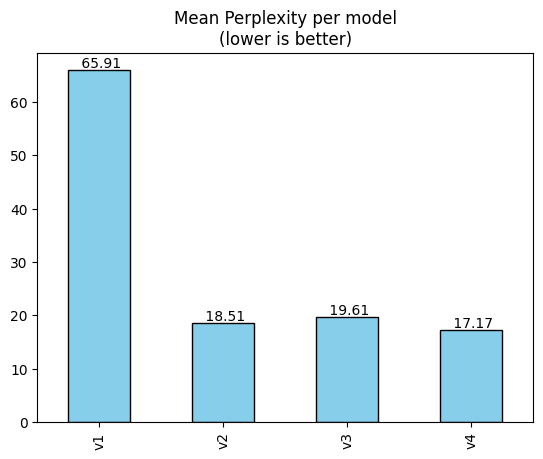

In [42]:
pd.DataFrame(perplexities).plot(kind='bar', legend=False, color='skyblue', edgecolor='black')
plt.xticks([0,1,2,3], ['v1', 'v2', 'v3', 'v4'])
plt.title('Mean Perplexity per model\n(lower is better)')

for i, value in enumerate(perplexities):
    plt.text(i, value, f"{value: .2f}", ha='center', va='bottom')
    
plt.show()